In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!file "/content/drive/MyDrive/shell-internship/archive"

/content/drive/MyDrive/shell-internship/archive: Zip archive data, at least v4.5 to extract, compression method=deflate


In [ ]:
!mkdir -p /content/data

In [ ]:
!unzip "/content/drive/MyDrive/internshipshell/archive.zip" -d "/content/data"

Archive:  /content/drive/MyDrive/internshipshell/archive.zip
  inflating: /content/data/Tree_Species_Dataset/.git/HEAD  
  inflating: /content/data/Tree_Species_Dataset/.git/config  
  inflating: /content/data/Tree_Species_Dataset/.git/description  
  inflating: /content/data/Tree_Species_Dataset/.git/hooks/applypatch-msg.sample  
  inflating: /content/data/Tree_Species_Dataset/.git/hooks/commit-msg.sample  
  inflating: /content/data/Tree_Species_Dataset/.git/hooks/fsmonitor-watchman.sample  
  inflating: /content/data/Tree_Species_Dataset/.git/hooks/post-update.sample  
  inflating: /content/data/Tree_Species_Dataset/.git/hooks/pre-applypatch.sample  
  inflating: /content/data/Tree_Species_Dataset/.git/hooks/pre-commit.sample  
  inflating: /content/data/Tree_Species_Dataset/.git/hooks/pre-merge-commit.sample  
  inflating: /content/data/Tree_Species_Dataset/.git/hooks/pre-push.sample  
  inflating: /content/data/Tree_Species_Dataset/.git/hooks/pre-rebase.sample  
  inflating: /cont

In [ ]:
import os

In [ ]:
repo_path="/content/drive/MyDrive/archive1/Tree_Species_Dataset"
print("contents: ",os.listdir(repo_path))

contents:  ['shirish', 'sugarcane', 'sonmahor', 'pipal', 'saptaparni', 'vad', 'simlo', 'pilikaren', 'other', 'sitafal', 'kesudo', 'motichanoti', 'kanchan', 'mango', 'khajur', 'neem', 'gunda', 'jamun', 'gulmohor', 'nilgiri', 'garmalo', 'babul', 'bamboo', 'amla', 'champa', 'cactus', 'coconut', 'banyan', 'bili', 'asopalav', '.git']


In [ ]:
class_dirs= os.listdir(repo_path)
print(f"Number of classs:{len(class_dirs)}")

Number of classs:31


In [ ]:
import glob
from genericpath import isdir
image_paths=[]
labels=[]
for class_name in os.listdir(repo_path):
  class_folder= os.path.join(repo_path,class_name)
  if os.path.isdir(class_folder):
    for img_file in os.listdir(class_folder):
      image_paths.append(os.path.join(class_folder,img_file))
      labels.append(class_name)
print(f"total images: {len(image_paths)}")

total images: 1605


In [ ]:
import pandas as pd

class_counts = {cls: len(os.listdir(os.path.join(repo_path, cls))) for cls in class_dirs}
class_counts_df = pd.DataFrame.from_dict(class_counts, orient='index', columns=['Image Count'])
print(class_counts_df.sort_values('Image Count', ascending=False).head())
print("shape: ",class_counts_df.shape)

            Image Count
other               150
sugarcane            50
shirish              50
pipal                50
saptaparni           50
shape:  (31, 1)


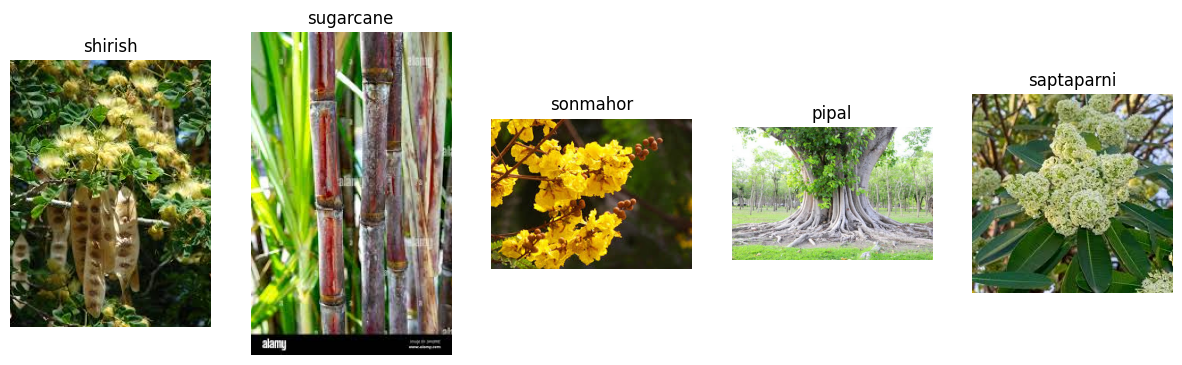

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

def show_sample_images(repo_path, class_dirs, n=5):
    plt.figure(figsize=(15, 10))
    for i, class_dir in enumerate(class_dirs[:n]):
        img_path = os.path.join(repo_path, class_dir, os.listdir(os.path.join(repo_path, class_dir))[0])
        img = Image.open(img_path)
        plt.subplot(1, n, i+1)
        plt.imshow(img)
        plt.title(class_dir)
        plt.axis('off')
    plt.show()

show_sample_images(repo_path, class_dirs)

In [ ]:
from PIL import Image, UnidentifiedImageError
import os
import pandas as pd

image_shapes = []

for class_dir in class_dirs:
    class_path = os.path.join(repo_path, class_dir)
    for img_file in os.listdir(class_path):
        img_path = os.path.join(class_path, img_file)

        try:
            with Image.open(img_path) as img:
                image_shapes.append(img.size)
        except UnidentifiedImageError:
            print(f"Skipped non-image file: {img_path}")
        except Exception as e:
            print(f"Error with file {img_path}: {e}")

# Create DataFrame
shapes_df = pd.DataFrame(image_shapes, columns=["Width", "Height"])
shapes_df.head()

Skipped non-image file: /content/drive/MyDrive/archive1/Tree_Species_Dataset/.git/HEAD
Skipped non-image file: /content/drive/MyDrive/archive1/Tree_Species_Dataset/.git/config
Skipped non-image file: /content/drive/MyDrive/archive1/Tree_Species_Dataset/.git/description
Error with file /content/drive/MyDrive/archive1/Tree_Species_Dataset/.git/info: [Errno 21] Is a directory: '/content/drive/MyDrive/archive1/Tree_Species_Dataset/.git/info'
Error with file /content/drive/MyDrive/archive1/Tree_Species_Dataset/.git/hooks: [Errno 21] Is a directory: '/content/drive/MyDrive/archive1/Tree_Species_Dataset/.git/hooks'


,Width,Height
0,194,259
1,194,259
2,204,247
3,225,225
4,279,181


In [ ]:
print(shapes_df.describe())

             Width       Height
count  1600.000000  1600.000000
mean    312.623125   269.821875
std     296.220501   278.014229
min     141.000000   128.000000
25%     225.000000   183.000000
50%     259.000000   200.000000
75%     275.000000   259.000000
max    4000.000000  4032.000000


In [ ]:
import hashlib
from collections import defaultdict
import os

hashes = defaultdict(list)

for class_dir in class_dirs:
    class_path = os.path.join(repo_path, class_dir)
    for img_file in os.listdir(class_path):
        img_path = os.path.join(class_path, img_file)

        # Skip if it's not a file
        if not os.path.isfile(img_path):
            continue

        try:
            with open(img_path, 'rb') as f:
                file_hash = hashlib.md5(f.read()).hexdigest()
                hashes[file_hash].append(img_path)
        except Exception as e:
            print(f"Skipping file {img_path}: {e}")

# Filter duplicates
duplicates = {h: files for h, files in hashes.items() if len(files) > 1}
print("Duplicate image sets found:", len(duplicates))

Duplicate image sets found: 82


In [ ]:
corrupt_images = []

for class_dir in class_dirs:
    for img_file in os.listdir(os.path.join(repo_path, class_dir)):
        img_path = os.path.join(repo_path, class_dir, img_file)
        try:
            img = Image.open(img_path)
            img.verify()
        except Exception as e:
            corrupt_images.append(img_path)

print("Corrupted images:", len(corrupt_images))

Corrupted images: 5


Duplicate set 1:


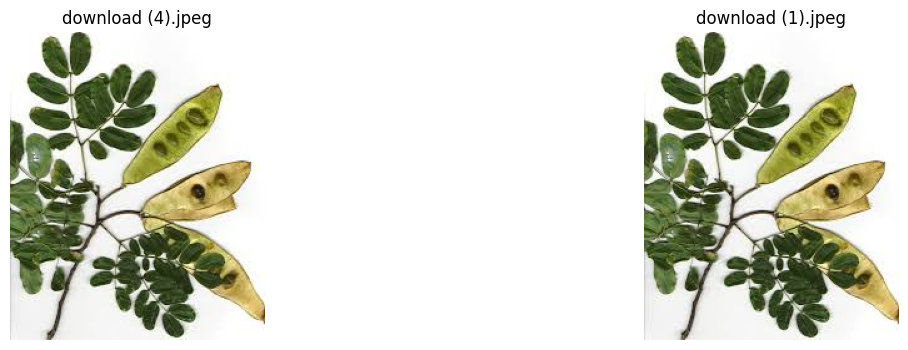

Duplicate set 2:


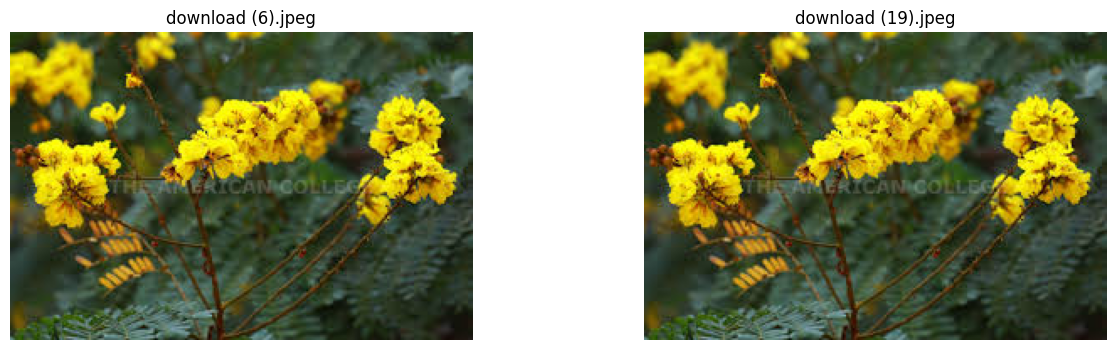

Duplicate set 3:


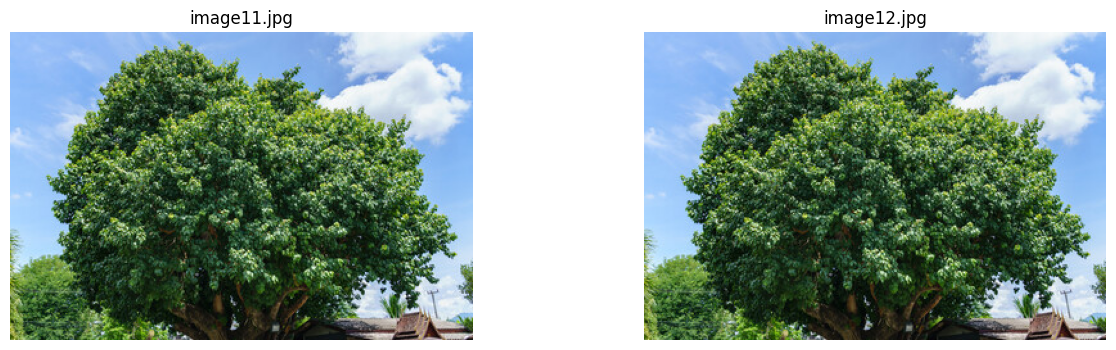

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

def show_duplicate_sets(duplicates, sets_to_display=3):
    shown = 0
    for hash_val, dup_paths in duplicates.items():
        if shown >= sets_to_display:
            break
        print(f"Duplicate set {shown + 1}:")
        plt.figure(figsize=(15, 4))
        for i, img_path in enumerate(dup_paths):
            try:
                img = Image.open(img_path)
                plt.subplot(1, len(dup_paths), i+1)
                plt.imshow(img)
                plt.title(os.path.basename(img_path))
                plt.axis('off')
            except:
                continue
        plt.show()
        shown += 1

show_duplicate_sets(duplicates, sets_to_display=3)

In [ ]:
import os

removed_count = 0

for dup_list in duplicates.values():
    # Keep the first, delete rest
    for img_path in dup_list[1:]:
        try:
            os.remove(img_path)
            removed_count += 1
        except Exception as e:
            print(f"Error deleting {img_path}: {e}")

print(f"✅ Removed {removed_count} duplicate images.")

✅ Removed 86 duplicate images.


In [ ]:
# Re-check to confirm duplicates removed
import hashlib
from collections import defaultdict
import os

hashes = defaultdict(list)

for class_dir in class_dirs:
    class_path = os.path.join(repo_path, class_dir)
    for img_file in os.listdir(class_path):
        img_path = os.path.join(class_path, img_file)

        # Skip if it's not a file
        if not os.path.isfile(img_path):
            continue

        try:
            with open(img_path, 'rb') as f:
                file_hash = hashlib.md5(f.read()).hexdigest()
                hashes[file_hash].append(img_path)
        except Exception as e:
            print(f"⚠ Skipping file {img_path}: {e}")

# Check for duplicates again
duplicates = {h: files for h, files in hashes.items() if len(files) > 1}
print("🔁 Duplicates remaining:", len(duplicates))

🔁 Duplicates remaining: 0


In [ ]:
from PIL import Image
import pandas as pd

# Gather image info
image_info = []

for class_dir in class_dirs:
    class_path = os.path.join(repo_path, class_dir)
    for img_file in os.listdir(class_path):
        img_path = os.path.join(class_path, img_file)
        try:
            with Image.open(img_path) as img:
                width, height = img.size
                image_info.append({
                    'path': img_path,
                    'width': width,
                    'height': height,
                    'class': class_dir
                })
        except:
            continue

df_sizes = pd.DataFrame(image_info)

# Define thresholds
small_imgs = df_sizes[(df_sizes['width'] < 150) | (df_sizes['height'] < 150)]
large_imgs = df_sizes[(df_sizes['width'] > 1000) | (df_sizes['height'] > 2000)]

print(f"🔻 Very small images: {len(small_imgs)}")
print(f"🔺 Very large images: {len(large_imgs)}")

🔻 Very small images: 20
🔺 Very large images: 40


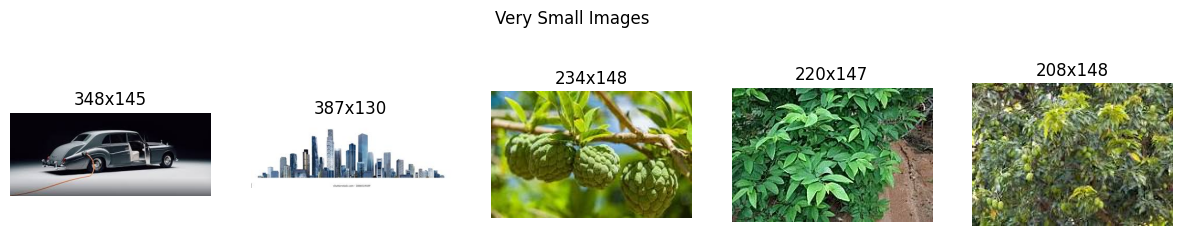

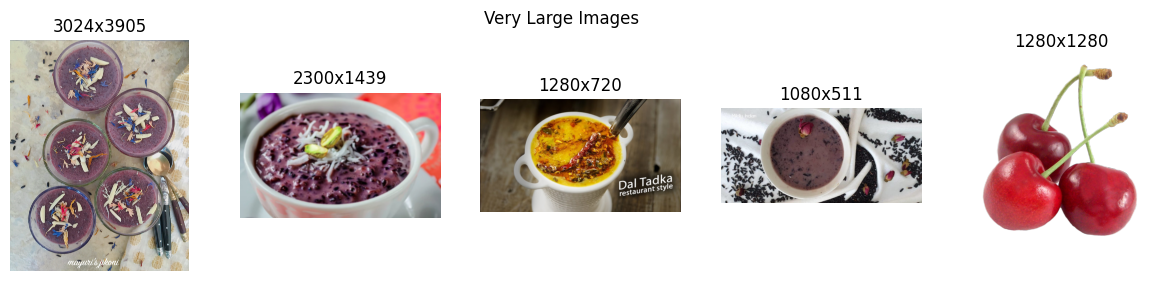

In [ ]:
def show_images(df_subset, title, n=5):
    plt.figure(figsize=(15, 3))
    for i, (_, row) in enumerate(df_subset.head(n).iterrows()):
        img = Image.open(row['path'])
        plt.subplot(1, n, i+1)
        plt.imshow(img)
        plt.title(f"{row['width']}x{row['height']}")
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

show_images(small_imgs, "Very Small Images")
show_images(large_imgs, "Very Large Images")

In [ ]:
import os

# Combine both sets
outliers = pd.concat([small_imgs, large_imgs])

# Remove them
removed_count = 0
for path in outliers['path']:
    try:
        os.remove(path)
        removed_count += 1
    except Exception as e:
        print(f"Failed to remove {path}: {e}")

print(f"🗑 Removed {removed_count} outlier images (small + large).")

🗑 Removed 60 outlier images (small + large).


In [ ]:
# Recalculate sizes
image_info = []

for class_dir in class_dirs:
    class_path = os.path.join(repo_path, class_dir)
    for img_file in os.listdir(class_path):
        img_path = os.path.join(class_path, img_file)
        try:
            with Image.open(img_path) as img:
                width, height = img.size
                image_info.append({
                    'path': img_path,
                    'width': width,
                    'height': height,
                    'class': class_dir
                })
        except:
            continue

df_sizes = pd.DataFrame(image_info)
print(df_sizes[['width', 'height']].describe())

             width       height
count  1454.000000  1454.000000
mean    275.872765   239.044704
std     117.507849   117.197342
min     150.000000   150.000000
25%     225.000000   183.000000
50%     259.000000   198.000000
75%     275.000000   256.000000
max    1000.000000  1247.000000


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define parameters
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32

# Augmentation and rescaling
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True
)

train_gen = datagen.flow_from_directory(
    repo_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    repo_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

Found 1177 images belonging to 31 classes.
Found 277 images belonging to 31 classes.


In [ ]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

base_model = EfficientNetB0(include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3), weights='imagenet')
base_model.trainable = False  # Freeze base model

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(train_gen.num_classes, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 31)             │         3,999 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,217,538 (16.09 MB)

 Trainable params: 167,967 (656.12 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

In [ ]:
EPOCHS = 10

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=EPOCHS
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 151s 4s/step - accuracy: 0.0520 - loss: 3.4693 - val_accuracy: 0.0903 - val_loss: 3.3917
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 115s 3s/step - accuracy: 0.0846 - loss: 3.4115 - val_accuracy: 0.0903 - val_loss: 3.3854
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 115s 3s/step - accuracy: 0.0678 - loss: 3.4085 - val_accuracy: 0.0903 - val_loss: 3.3835
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 114s 3s/step - accuracy: 0.0849 - loss: 3.3905 - val_accuracy: 0.0903 - val_loss: 3.3873
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 113s 3s/step - accuracy: 0.0850 - loss: 3.3883 - val_accuracy: 0.0903 - val_loss: 3.3821
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 114s 3s/step - accuracy: 0.0912 - loss: 3.4002 - val_accuracy: 0.0903 - val_loss: 3.3797
Epoch 7/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 123s 3s/step - accuracy: 0.0798 - loss: 3.3961 - val_accuracy: 0.0903 - val_loss: 3.3757
Epoch 8/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 134s 4s/step - accuracy: 0.0784 - loss: 3.4078 - val_accuracy: 0.0903 - v

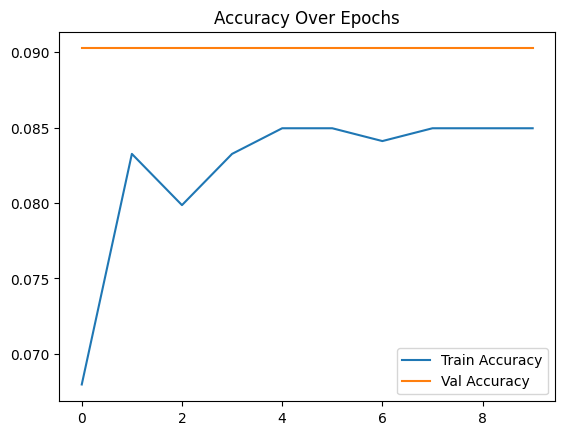

In [ ]:
# Plot accuracy/loss curves
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title("Accuracy Over Epochs")
plt.show()

# Save model
model.save("tree_species_model.h5")

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define image properties
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32

# Data generators
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = datagen.flow_from_directory(
    repo_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    repo_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)
# Number of output classes
num_classes = train_generator.num_classes

# Build a basic CNN model
model_cnn = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model_cnn.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Train the model
EPOCHS = 10
history_cnn = model_cnn.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=val_generator
)

# Save the model
model_cnn.save('basic_cnn_tree_species.h5')
print("✅ Basic CNN model saved as 'basic_cnn_tree_species.h5'")

Found 1177 images belonging to 31 classes.
Found 277 images belonging to 31 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 155s 4s/step - accuracy: 0.0560 - loss: 3.6902 - val_accuracy: 0.1300 - val_loss: 3.2218
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 198s 4s/step - accuracy: 0.1012 - loss: 3.2116 - val_accuracy: 0.1372 - val_loss: 3.0388
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 148s 4s/step - accuracy: 0.1487 - loss: 3.0520 - val_accuracy: 0.1769 - val_loss: 2.9168
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 148s 4s/step - accuracy: 0.1481 - loss: 2.9891 - val_accuracy: 0.2202 - val_loss: 2.7256
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 148s 4s/step - accuracy: 0.2127 - loss: 2.8249 - val_accuracy: 0.2166 - val_loss: 2.7805
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 147s 4s/step - accuracy: 0.1870 - loss: 2.8184 - val_accuracy: 0.2310 - val_loss: 2.6602
Epoch 7/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 203s 4s/step - accuracy: 0.2471 - loss: 2.6786 - val_accuracy: 0.2527 - val_loss: 2.5647
Epoch 8/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 203s 4s/step - accuracy: 0.2466 - loss: 2.6413 - val_accuracy: 0.3069 - v

✅ Basic CNN model saved as 'basic_cnn_tree_species.h5'
